<a href="https://colab.research.google.com/github/AnkitKhatawaliya/DataSets/blob/main/ML_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/sukhioo7/dataset/main/insurance.csv"
Insurance=pd.read_csv(url)
data=Insurance

<Axes: xlabel='gender', ylabel='charges'>

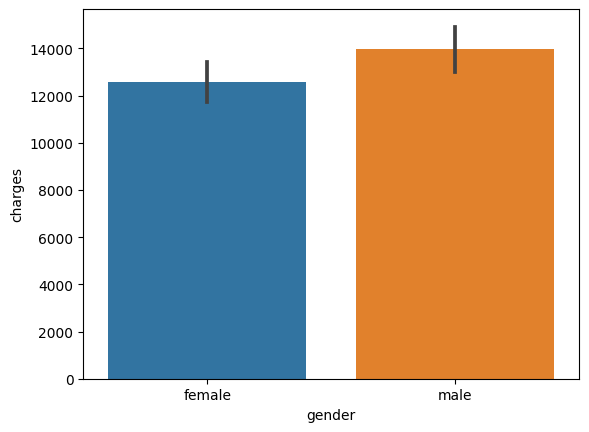

In [3]:
sns.barplot(data=Insurance, x='gender',y='charges')

<Axes: xlabel='gender', ylabel='charges'>

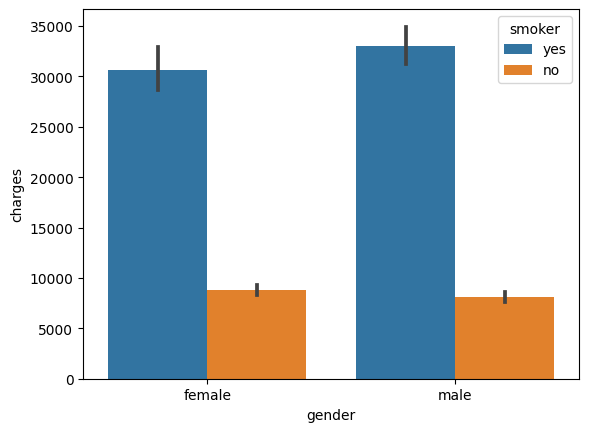

In [4]:
sns.barplot(data=Insurance, x='gender',y='charges',hue='smoker')

In [5]:
Insurance.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
Insurance.drop('gender',axis=1,inplace=True)
Insurance.drop('smoker',axis=1,inplace=True)
Insurance.drop('region',axis=1,inplace=True)

In [7]:
#sns.pairplot(data=Insurance)

In [8]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = Insurance[['age', 'bmi', 'children']]
y = Insurance['charges']

# Split the data into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 'test_size' determines the proportion of the dataset that becomes the test set
# 'random_state' is set for reproducibility, you can use any number or leave it out

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1204, 3)
X_test shape: (134, 3)
y_train shape: (1204,)
y_test shape: (134,)


In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

pred=linear_model.predict(X_test)

In [10]:
# Create a feature vector for the new laptop
charges_for_new_person = [[27, 24, 2]]

# Use the trained model to make a price prediction
predicted_charge = linear_model.predict(charges_for_new_person)

# Print the predicted price
print("Predicted Charges for new person :", predicted_charge[0])


Predicted Charges for new person : 8775.095376892388


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 9005.975205024017


In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))
print(np.sqrt(mean_squared_error(pred,y_test)))

9005.975205024017
116528570.64556819
10794.840000924894


In [13]:

url="https://raw.githubusercontent.com/sukhioo7/dataset/main/insurance.csv"
data=pd.read_csv(url)


In [14]:
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='region', ylabel='charges'>

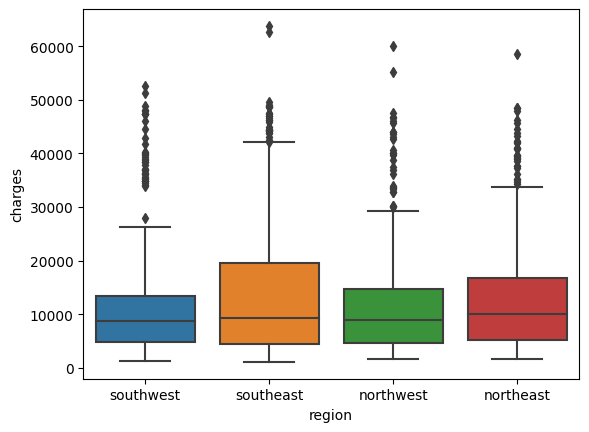

In [15]:
sns.boxplot(data=data,x='region',y='charges')

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_gender = LabelEncoder()

label_gender.fit(data['gender'])

data['gender'] = label_gender.transform(data['gender'])


In [17]:
label_smoker = LabelEncoder()

label_smoker.fit(data['smoker'])

data['smoker'] = label_smoker.transform(data['smoker'])

In [18]:
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
from sklearn.preprocessing import OneHotEncoder

one_hot=OneHotEncoder()

In [20]:
one_hot.fit(data[['region']])

OneHotEncoder()

In [21]:
arr_region = one_hot.transform(data[['region']]).toarray()

In [22]:
region_cols = one_hot.categories_

In [23]:
region = pd.DataFrame(arr_region,columns=['northeast','northwest','southeast','southwest'],dtype=int)

In [24]:
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [25]:
data.drop('region',axis=1,inplace=True)

In [26]:
data = pd.concat([data , region], axis=1)

In [27]:
data.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
